**EJEMPLO 1** "hello world TinyML"

IMPORTAR DEPENDENCIAS.

In [ ]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


**GENERAR LOS DATOS**

vamos a entrenar una red para modelar datos generados por una función seno. Esto dará como resultado un modelo que puede tomar un valor, x, y predecir su seno, y.

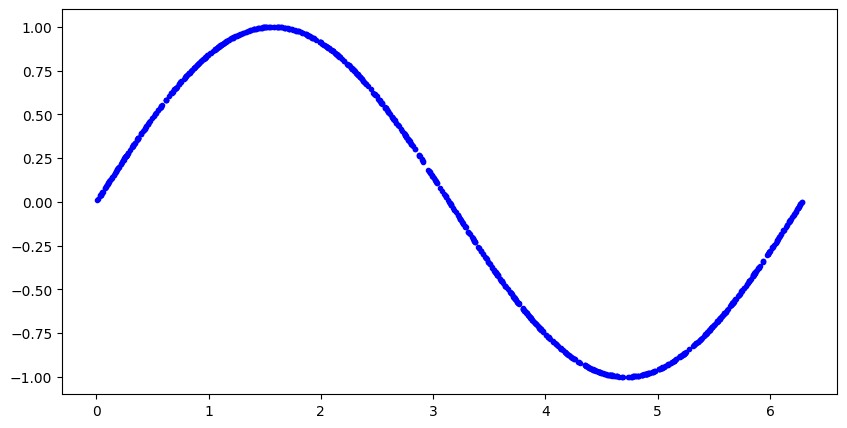

In [ ]:
muestras=1000
semilla =1234
np.random.seed(semilla)
tf.random.set_seed(semilla)

x_valores = np.random.uniform(low=0, high=2*math.pi, size=muestras)
np.random.shuffle(x_valores)
y_valores = np.sin(x_valores)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_valores, y_valores,'b.')
plt.show()




**AGREGAMOS UN POCO DE RUIDO**

agregamos un ruido aleatoreo a cada valor con el fin de obtener datos desordenados para comprobar la eficacia de nuestro modelo al predecir la funcion seno.

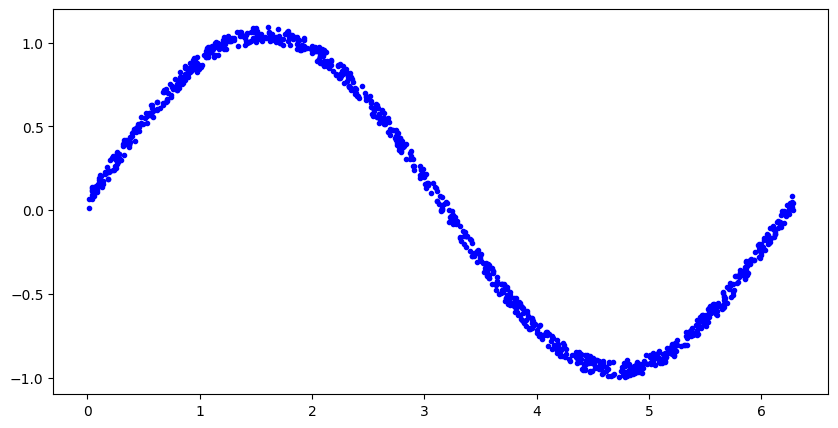

In [ ]:
y_valores += 0.1*np.random.rand(*y_valores.shape)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_valores, y_valores, 'b.')
plt.show()


**DIVIDIR LOS DATOS**

Para evaluar la precisión del modelo que entrenamos, necesitaremos comparar sus predicciones con datos reales y verificar qué tan bien coinciden. Esta evaluación ocurre durante el entrenamiento (donde se lo denomina validación) y después del entrenamiento (lo que se denomina prueba). En ambos casos, es importante que usemos datos nuevos que no se hayan usado para entrenar el modelo.

Para asegurarnos de tener datos para usar en la evaluación, reservaremos algunos antes de comenzar la capacitación. Reservaremos el 20 % de nuestros datos para la validación y otro 20 % para las pruebas. El 60% restante se utilizará para entrenar el modelo. Esta es una división típica utilizada cuando se entrenan modelos.

El siguiente código dividirá nuestros datos y luego trazará cada conjunto como un color diferente:

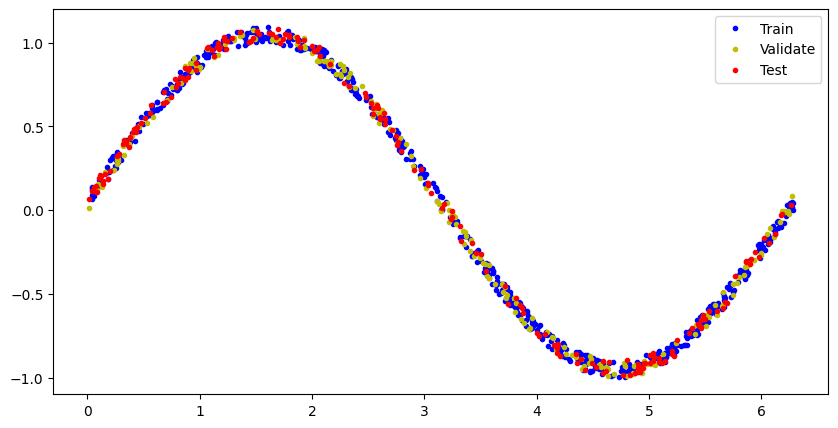

In [ ]:
TRAIN_SPLIT = int(0.6 * muestras)
TEST_SPLIT = int(0.2 * muestras + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_valores,[TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_valores,[TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size)== muestras
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

**Diseña un modelo**

Vamos a construir un modelo que tomará un valor de entrada (en este caso, x) y lo usaremos para predecir un valor de salida numérico (el seno de x). Este tipo de problema se llama regresión.

Para lograr esto, vamos a crear una red neuronal simple. Utilizará capas de neuronas para intentar aprender cualquier patrón subyacente a los datos de entrenamiento, de modo que pueda hacer predicciones.

Para empezar, definiremos dos capas. La primera capa toma una sola entrada (nuestro valor x) y la ejecuta a través de 16 neuronas. Según esta entrada, cada neurona se activará hasta cierto punto en función de su estado interno (sus valores de peso y sesgo). El grado de activación de una neurona se expresa como un número.

Los números de activación de nuestra primera capa se alimentarán como entradas a nuestra segunda capa, que es una sola neurona. Aplicará sus propios pesos y sesgos a estas entradas y calculará su propia activación, que se generará como nuestro valor y.

Nota: Para obtener más información sobre cómo funcionan las redes neuronales, puede explorar los laboratorios de código Learn TensorFlow.

El código de la siguiente celda define nuestro modelo usando Keras, la API de alto nivel de TensorFlow para crear redes de aprendizaje profundo. Una vez definida la red, la compilamos, especificando parámetros que determinan cómo será entrenada:

In [ ]:
from tensorflow.keras import layers

modelo1= tf.keras.Sequential()
modelo1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
modelo1.add(layers.Dense(1))
modelo1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
modelo1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenar al modelo**

Una vez que hemos definido el modelo, podemos usar nuestros datos para entrenarlo. El entrenamiento consiste en pasar un valor x a la red neuronal, comprobar en qué medida se desvía la salida de la red del valor y esperado y ajustar los pesos y sesgos de las neuronas para que sea más probable que la salida sea correcta la próxima vez.

El entrenamiento ejecuta este proceso en el conjunto de datos completo varias veces, y cada ejecución completa se conoce como una época. El número de épocas a ejecutar durante el entrenamiento es un parámetro que podemos configurar.

Durante cada época, los datos se ejecutan a través de la red en múltiples lotes. Cada lote, varias piezas de datos se pasan a la red, produciendo valores de salida. La corrección de estas salidas se mide en conjunto y los pesos y sesgos de la red se ajustan en consecuencia, una vez por lote. El tamaño del lote también es un parámetro que podemos establecer.

El código de la siguiente celda usa los valores x e y de nuestros datos de entrenamiento para entrenar el modelo. Funciona durante 1000 épocas, con 16 piezas de datos en cada lote. También pasamos algunos datos para usarlos para la validación. Como verá cuando ejecute la celda, el entrenamiento puede tardar un tiempo en completarse:

In [ ]:
history_1 = modelo1.fit(x_train, y_train, epochs=800, batch_size=16, validation_data=(x_validate, y_validate))


Epoch 1/800
38/38 [==============================] - 1s 7ms/step - loss: 0.4227 - mae: 0.5337 - val_loss: 0.3785 - val_mae: 0.5180
Epoch 2/800
38/38 [==============================] - 0s 4ms/step - loss: 0.3598 - mae: 0.5143 - val_loss: 0.3499 - val_mae: 0.5003
Epoch 3/800
38/38 [==============================] - 0s 3ms/step - loss: 0.3336 - mae: 0.4978 - val_loss: 0.3262 - val_mae: 0.4818
Epoch 4/800
38/38 [==============================] - 0s 3ms/step - loss: 0.3096 - mae: 0.4795 - val_loss: 0.3032 - val_mae: 0.4658
Epoch 5/800
38/38 [==============================] - 0s 3ms/step - loss: 0.2873 - mae: 0.4638 - val_loss: 0.2798 - val_mae: 0.4496
Epoch 6/800
38/38 [==============================] - 0s 3ms/step - loss: 0.2670 - mae: 0.4510 - val_loss: 0.2632 - val_mae: 0.4363
Epoch 7/800
38/38 [==============================] - 0s 3ms/step - loss: 0.2495 - mae: 0.4372 - val_loss: 0.2457 - val_mae: 0.4252
Epoch 8/800
38/38 [==============================] - 0s 4ms/step - loss: 0.2334 - m

**Consulta las métricas de entrenamiento**

Durante el entrenamiento, el rendimiento del modelo se mide constantemente con nuestros datos de entrenamiento y los datos de validación que reservamos anteriormente. El entrenamiento produce un registro de datos que nos dice cómo cambió el rendimiento del modelo a lo largo del proceso de entrenamiento.

Las siguientes celdas mostrarán algunos de esos datos en forma gráfica:

In [ ]:
loss= history_1.history['loss']
val_loss= history_1.history['val_loss']
epocas= range(1, len(loss)+1)
plt.plot(epocas, loss, 'g.', label='Training loss')
plt.plot(epocas, val_loss, 'b.', label='Validation loss')
plt.xlabel('Epocas')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
SKIP=50
plt.plot(epocas[SKIP: ], loss[SKIP: ], 'g.', label='Training loss')
plt.plot(epocas[SKIP: ], val_loss[SKIP: ], 'b.', label='validation loss')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

Para obtener más información sobre el rendimiento de nuestro modelo, podemos trazar algunos datos más. Esta vez, trazaremos el error absoluto medio, que es otra forma de medir qué tan lejos están las predicciones de la red de los números reales:

In [ ]:
mae= history_1.history['mae']
val_mae= history_1.history['val_mae']

plt.plot(epocas[SKIP:], mae[SKIP: ], 'g.', label='Training mae')
plt.plot(epocas[SKIP:], val_mae[SKIP: ], 'b.', label='validation mae')
plt.xlabel('Epocas')
plt.ylabel('mae')
plt.legend()
plt.show()

Este gráfico de error absoluto medio nos da algunas pistas adicionales. Podemos ver que las predicciones con nuestros datos de entrenamiento muestran un error consistentemente menor que con nuestros datos de validación, lo que significa que es probable que la red se haya sobreajustado o haya aprendido los datos de entrenamiento tan rígidamente que no puede hacer predicciones efectivas sobre nuevos datos.

Además, los valores de error absoluto medio son bastante altos, alrededor de ~0,31, lo que significa que muchas de las predicciones del modelo tienen al menos un 31 % de error. Un error del 31% significa que estamos muy lejos de modelar con precisión la onda sinusoidal.

Para obtener más información sobre lo que está sucediendo, podemos trazar las predicciones de nuestra red para los datos de entrenamiento frente a los valores esperados:

In [ ]:
prediccion= modelo1.predict(x_train)

plt.clf
plt.title('datos de entrenamiento vs datos del modelo')
plt.plot(x_test, y_test, 'b.', label='Entrenamiento')
plt.plot(x_train, prediccion, 'r.', label='Prediccion')
plt.legend()
plt.show()

Cambiar nuestro modelo

Para agrandar nuestro modelo, agreguemos una capa adicional de neuronas. La siguiente celda redefine nuestro modelo de la misma manera que antes, pero con una capa adicional de 16 neuronas en el medio:

In [ ]:
modelo2 = tf.keras.Sequential()
modelo2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
modelo2.add(layers.Dense(16, activation='relu'))
modelo2.add(layers.Dense(1))
modelo2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
modelo2.summary()


In [ ]:
history_2 = modelo2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))


In [ ]:
loss= history_2.history['loss']
val_loss= history_2.history['val_loss']
epocas= range(1, len(loss) + 1)
plt.plot(epocas, loss, 'g.', label='Training loss')
plt.plot(epocas, val_loss, 'b.', label='Validation loss')
plt.title('Training vs validation loss')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.show()




In [ ]:
SKIP=100
loss= history_2.history['loss']
val_loss= history_2.history['val_loss']
plt.clf()
plt.plot(epocas[SKIP: ], loss[SKIP: ], 'g.', label='Training loss')
plt.plot(epocas[SKIP: ], val_loss[SKIP: ], 'b.', label='Validation loss')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf

mae=history_2.history['mae']
val_mae= history_2.history['val_mae']

plt.plot(epocas[SKIP: ], mae[SKIP: ], 'g.', label='Training mae')
plt.plot(epocas[SKIP: ], val_mae[SKIP: ], 'b.', label='Validation mae')
plt.xlabel('Epocas')
plt.ylabel('Mae')
plt.legend()
plt.show()

¡Buenos resultados! De estos gráficos, podemos ver dos cosas emocionantes:

Las métricas son mejores para la validación que para el entrenamiento, lo que significa que la red no se está sobreajustando
La pérdida general y MAE son mucho mejores que nuestra red anterior
La razón por la que las métricas para la validación son mejores que las del entrenamiento (y no simplemente idénticas) es que las métricas de validación se calculan al final de cada época, mientras que las métricas de entrenamiento se calculan a lo largo de la época, por lo que la validación ocurre en un modelo que ha sido entrenado. ligeramente más largo.

¡Todo esto significa que nuestra red parece estar funcionando bien! Para confirmar, verifiquemos sus predicciones con el conjunto de datos de prueba que reservamos anteriormente:

In [ ]:
loss = modelo2.evaluate(x_test, y_test)
prediccion = modelo2.predict(x_test)

plt.clf()
plt.title('Comparacion de los valores de entrada con el modelo terminado')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, prediccion, 'r.', label='Predicted')
plt.legend()
plt.show()

¡Mucho mejor! Las métricas de evaluación que imprimimos muestran que el modelo tiene una baja pérdida y MAE en los datos de prueba, y las predicciones se alinean visualmente con nuestros datos bastante bien.

El modelo no es perfecto; sus predicciones no forman una curva sinusoidal suave. Por ejemplo, la línea se vuelve casi recta cuando x está entre 4 y 5. Si quisiéramos ir más allá, podríamos intentar aumentar aún más la capacidad del modelo, tal vez usando algunas técnicas para defendernos del sobreajuste.

Sin embargo, una parte importante del aprendizaje automático es saber cuándo salir, y este modelo es lo suficientemente bueno para nuestro caso de uso, que es hacer que algunos LED parpadeen en un patrón agradable.

**Convertir a TensorFlow Lite**

Ahora tenemos un modelo aceptablemente preciso en la memoria. Sin embargo, para usar esto con TensorFlow Lite para microcontroladores, necesitaremos convertirlo al formato correcto y descargarlo como un archivo. Para hacer esto, usaremos TensorFlow Lite Converter. El convertidor genera un archivo en un formato especial que ahorra espacio para usar en dispositivos con limitaciones de memoria.

Dado que este modelo se implementará en un microcontrolador, ¡queremos que sea lo más pequeño posible! Una técnica para reducir el tamaño de los modelos se llama cuantización. Reduce la precisión de los pesos del modelo, lo que ahorra memoria, a menudo sin mucho impacto en la precisión. Los modelos cuantificados también se ejecutan más rápido, ya que los cálculos necesarios son más simples.

TensorFlow Lite Converter puede aplicar cuantización mientras convierte el modelo. En la siguiente celda, convertiremos el modelo dos veces, una con cuantización y otra sin:

In [ ]:



converter = tf.lite.TFLiteConverter.from_keras_model(modelo2)
tflite_model = converter.convert()


open("sine_model.tflite", "wb").write(tflite_model)


converter = tf.lite.TFLiteConverter.from_keras_model(modelo2)


converter.optimizations = [tf.lite.Optimize.DEFAULT]


def representative_dataset_generator():
  for value in x_test:

    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator

tflite_model = converter.convert()


open("sine_model_quantized.tflite", "wb").write(tflite_model)


Para crear un modelo cuantificado que se ejecute de la manera más eficiente posible, debemos proporcionar un "conjunto de datos representativo", un conjunto de números que representan el rango completo de valores de entrada en el conjunto de datos en el que se entrenó el modelo.

En la celda anterior, podemos usar los valores x de nuestro conjunto de datos de prueba como un conjunto de datos representativo. Definimos una función, represent_dataset_generator(), que usa el operador de rendimiento para devolverlos uno por uno.

**Probar los modelos convertidos**

Para demostrar que estos modelos siguen siendo precisos después de la conversión y la cuantificación, los usaremos para hacer predicciones y compararlas con los resultados de nuestras pruebas:

In [ ]:
#Instanciar un intérprete para cada modelo
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

#Asignar memoria para cada modelo
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

#Obtener índices de los tensores de entrada y salida
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Crear matrices para almacenar los resultados
sine_model_predictions = []
sine_model_quantized_predictions = []

# Ejecute el intérprete de cada modelo para cada valor y almacene los resultados en matrices

for x_value in x_test:
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype= np.float32)
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


plt.clf()
plt.rcParams["figure.figsize"] = (20,14)
plt.title('Comparacion entre el modelo normal y el cuantizado')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, prediccion, 'ro', label='Prediccion original')
plt.plot(x_test, sine_model_predictions, 'bx', label='Predicion lite')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Predicion lite quantized')
plt.legend()
plt.show()




Podemos ver en el gráfico que las predicciones para el modelo original, el modelo convertido y el modelo cuantificado son lo suficientemente cercanas como para ser casi indistinguibles. ¡Esto significa que nuestro modelo cuantificado está listo para usar!

Podemos imprimir la diferencia en el tamaño del archivo:

In [ ]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("El modelo basico es de %d  bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("El modelo cuantizado es de %d bytes" % quantized_model_size)
diferencia = basic_model_size - quantized_model_size
print("La diferencia es de %d bytes" % diferencia)


Nuestro modelo cuantificado es 180 bytes más pequeño que la versión original, lo cual es genial, pero es solo una pequeña reducción de tamaño. Con alrededor de 2,7 kilobytes, este modelo ya es tan pequeño que los pesos representan una pequeña proporción del tamaño total, lo que significa que la cuantificación solo tiene un efecto pequeño.

Los modelos más complejos tienen muchos más pesos, lo que significa que el ahorro de espacio de la cuantización será mucho mayor, acercándose a 4x para los modelos más sofisticados.

Independientemente, nuestro modelo cuantizado tardará menos tiempo en ejecutarse que la versión original, ¡lo cual es importante en un microcontrolador diminuto!

**Escribir en un archivo C**

El paso final en la preparación de nuestro modelo para usarlo con TensorFlow Lite para microcontroladores es convertirlo en un archivo fuente C. Puede ver un ejemplo de este formato en hello_world/sine_model_data.cc.

Para hacerlo, podemos usar una utilidad de línea de comandos llamada xxd. La siguiente celda ejecuta xxd en nuestro modelo cuantificado e imprime la salida:

In [ ]:
!apt-get -qq install xxd

!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc

!cat sine_model_quantized.cc

Podemos copiar y pegar este resultado en el código fuente de nuestro proyecto, o descargar el archivo usando el menú plegable en el lado izquierdo de este Colab.